In [13]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import mannwhitneyu, wasserstein_distance

In [14]:
def plot(s, mu, sigma):
    count, bins, ignored = plt.hist(s, 30, density=True, alpha=0.6)
    plt.plot(
        bins, 1/(sigma * np.sqrt(2 * np.pi)) *
        np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
        linewidth=2, color='r'
    )
    

In [22]:
mu1, sigma1 = 20, 4 # mean and standard deviation
mu2, sigma2 = 21, 4
mu3, sigma3 = 40, 7

s1 = np.random.normal(mu1, sigma1, 1000)
s2 = np.random.normal(mu2, sigma2, 1000)
s3 = np.random.normal(mu3, sigma3, 1000)

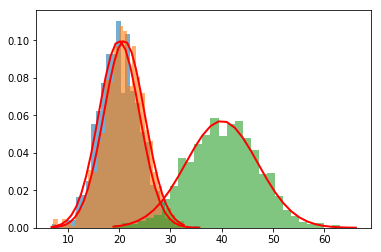

In [23]:
plot(s=s1, mu=mu1, sigma=sigma1)
plot(s=s2, mu=mu2, sigma=sigma2)
plot(s=s3, mu=mu3, sigma=sigma3)
plt.show()

In [24]:
help(wasserstein_distance)

Help on function wasserstein_distance in module scipy.stats.stats:

wasserstein_distance(u_values, v_values, u_weights=None, v_weights=None)
    Compute the first Wasserstein distance between two 1D distributions.
    
    This distance is also known as the earth mover's distance, since it can be
    seen as the minimum amount of "work" required to transform :math:`u` into
    :math:`v`, where "work" is measured as the amount of distribution weight
    that must be moved, multiplied by the distance it has to be moved.
    
    .. versionadded:: 1.0.0
    
    Parameters
    ----------
    u_values, v_values : array_like
        Values observed in the (empirical) distribution.
    u_weights, v_weights : array_like, optional
        Weight for each value. If unspecified, each value is assigned the same
        weight.
        `u_weights` (resp. `v_weights`) must have the same length as
        `u_values` (resp. `v_values`). If the weight sum differs from 1, it
        must still be posit

In [25]:
print(wasserstein_distance(s1, s2))
print(wasserstein_distance(s1, s3))

0.9576882810918992
20.40843228647354


In [26]:
help(mannwhitneyu)

Help on function mannwhitneyu in module scipy.stats.stats:

mannwhitneyu(x, y, use_continuity=True, alternative=None)
    Compute the Mann-Whitney rank test on samples x and y.
    
    Parameters
    ----------
    x, y : array_like
        Array of samples, should be one-dimensional.
    use_continuity : bool, optional
            Whether a continuity correction (1/2.) should be taken into
            account. Default is True.
    alternative : None (deprecated), 'less', 'two-sided', or 'greater'
            Whether to get the p-value for the one-sided hypothesis ('less'
            or 'greater') or for the two-sided hypothesis ('two-sided').
            Defaults to None, which results in a p-value half the size of
            the 'two-sided' p-value and a different U statistic. The
            default behavior is not the same as using 'less' or 'greater':
            it only exists for backward compatibility and is deprecated.
    
    Returns
    -------
    statistic : float
     

In [27]:
print(mannwhitneyu(s1, s2))
print(mannwhitneyu(s1, s3))

print(1-mannwhitneyu(s1, s2).pvalue)
print(1-mannwhitneyu(s1, s3).pvalue)

MannwhitneyuResult(statistic=429320.0, pvalue=2.206882713602907e-08)
MannwhitneyuResult(statistic=5445.0, pvalue=0.0)
0.9999999779311729
1.0


In [28]:
print(mannwhitneyu(s1, s2, alternative='greater'))
print(mannwhitneyu(s1, s3, alternative='greater'))

print(1-mannwhitneyu(s1, s2, alternative='greater').pvalue)
print(1-mannwhitneyu(s1, s3, alternative='greater').pvalue)

MannwhitneyuResult(statistic=429320.0, pvalue=0.9999999779408192)
MannwhitneyuResult(statistic=5445.0, pvalue=1.0)
2.2059180815325874e-08
0.0


In [42]:
def number_of_individuals_factor(y):
        return 1 / (np.sqrt(y) ** 2)

In [43]:
number_of_individuals_factor(10)

0.09999999999999998

In [44]:
number_of_individuals_factor(5)

0.19999999999999996

In [45]:
number_of_individuals_factor(20)

0.04999999999999999

In [35]:
def number_of_individuals_factor(y):
        return 1 / np.sqrt(y)

In [36]:
number_of_individuals_factor(10)

0.31622776601683794

In [37]:
number_of_individuals_factor(5)

0.4472135954999579

In [38]:
number_of_individuals_factor(80)

0.11180339887498948